1- First we import the libraries we needed in this project.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [4]:
df = pd.read_csv('concrete_data.csv')

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.shape

(1030, 9)

2- Check the null values if have, and sum them up.

In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

3- Some part of EDA(Exploratory Data Analysis), heatmap

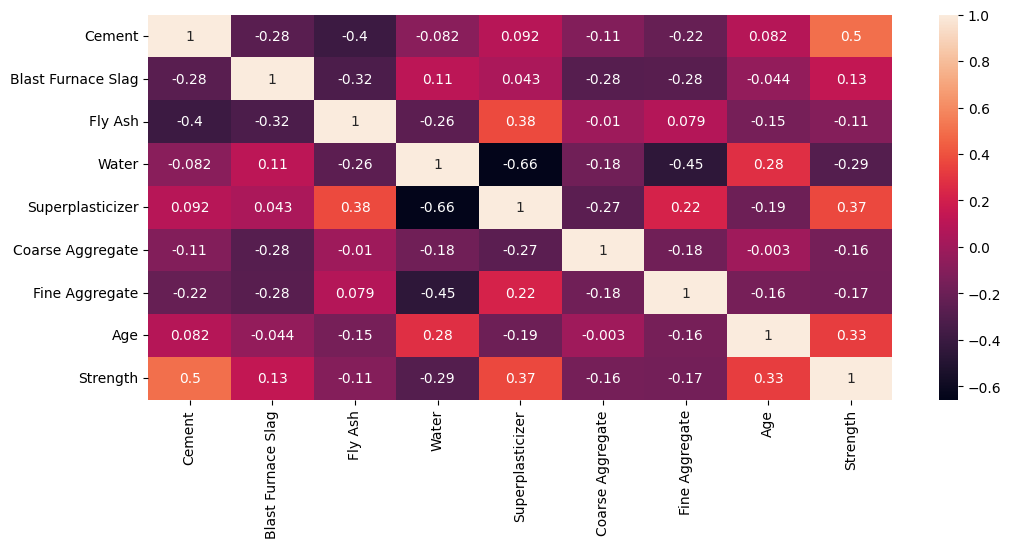

In [8]:
plt.figure(figsize=(12, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

4- Split the data into prediction and Targeted values

In [9]:
x = df[df.columns[:8]]
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
y= df[df.columns[-1]]
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [11]:
n_cols = x.shape[1]
n_cols

8

5- Importing the libraries of Machine learning model that we apply.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf
import tensorflow.keras as keras


In [13]:
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense

6- This is our **A** task, is which the following are the conditions that we will apply in model.

- Hidden Layer: 1 
- Nodes: 10
- Activation Function: ReLU
- Optimizer: Adam
- Loss Function: Mean Squared Error
- Epochs: 50 

In [14]:
mse_A = []
r2_A = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_A.append(mean_squared_error(y_test, y_pred))
    r2_A.append(r2_score(y_test, y_pred))




10/10 [==============================] - 0s 2ms/step


In [15]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_A)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_A)))

mse_Mean: 416.70
mse_StdDev: 693.59


In [16]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_A)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_A)))

R^2_Mean: -0.51
R^2_StdDev: 2.53


7- This is our **B** task, is which the following are the conditions that we will apply in model.

**B. MODEL WITH NORMALIZED DATA**

**Network Properties:**

- Hidden Layer: 1
- Nodes: 10
- Activation Function: ReLU
- Optimizer: Adam
- Loss Function: Mean Squared Error
- Epochs: 50
  
Model is retrain with normalized data.

8- We will normalize the data before applying model.

In [18]:
X_norm = (x - x.mean()) / x.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [22]:
mse_B = []
r2_B = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_B.append(mean_squared_error(y_test, y_pred))
    r2_B.append(r2_score(y_test, y_pred))

10/10 [==============================] - 0s 2ms/step


In [24]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_B)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_B)))

mse_Mean: 334.82
mse_StdDev: 75.16


In [25]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_B)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_B)))

R^2_Mean: -0.21
R^2_StdDev: 0.27


9- This is our **C** task, is which the following are the conditions that we will apply in model.

**C. MODEL WITH 100 EPOCHS**

**Network Properties:**

- Hidden Layer: 1
- Nodes: 10
- Activation Function: ReLU
- Optimizer: Adam
- Loss Function: Mean Squared Error
- Epochs: 100

Model is retrained with 100 epochs.

In [27]:
mse_C = []
r2_C = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_C.append(mean_squared_error(y_test, y_pred))
    r2_C.append(r2_score(y_test, y_pred))

10/10 [==============================] - 0s 5ms/step


In [28]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_C)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_C)))

mse_Mean: 165.27
mse_StdDev: 19.25


In [29]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_C)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_C)))

R^2_Mean: 0.40
R^2_StdDev: 0.07


10- This is our **D** task, is which the following are the conditions that we will apply in model.

**D. MODEL WITH 3 HIDDEN LAYERS**

**Network Properties:**

- Hidden Layers: 3
- Nodes: 10
- Activation Function: ReLU
- Optimizer: Adam
- Loss Function: Mean Squared Error
- Epochs: 100
  
Model is retrained with 3 hidden layers.

In [30]:
mse_D = []
r2_D = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_D.append(mean_squared_error(y_test, y_pred))
    r2_D.append(r2_score(y_test, y_pred))

10/10 [==============================] - 0s 1ms/step


In [31]:
print('mse_Mean: {:.2f}'.format(np.mean(mse_D)))
print('mse_StdDev: {:.2f}'.format(np.std(mse_D)))

mse_Mean: 85.23
mse_StdDev: 21.05


In [32]:
print('R^2_Mean: {:.2f}'.format(np.mean(r2_D)))
print('R^2_StdDev: {:.2f}'.format(np.std(r2_D)))

R^2_Mean: 0.70
R^2_StdDev: 0.07
